In [3]:
# from PIL import Image
import imagehash

import pandas as pd
import numpy as np
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Flatten
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras import backend as K
# import multiprocessing
# from joblib import Parallel, delayed
# from tqdm import tqdm

# import cv2
# import numpy
# import glob
# import pylab as plt

import cv2
import numpy
import glob
import pylab as plt

import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

from PIL import Image, ImageFile 
import imagehash 
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
test_labels = pd.read_csv("case_study_image_classification_Test_Prediction.csv")
test_labels.head()

,filename,x_min,y_min,x_max,y_max
0,cb19bd23170a547e9bdc2d66ad60fb02-2,244.0,120.0,600.0,589.0
1,29798e002137b56731311c7b4e3f2d37-2,48.0,409.0,208.0,574.0
2,b7c571c3c8b35bed7cb672542db567f2-ivorymulti,NaN,NaN,NaN,NaN
3,8fd862d8eb8b37d4657a9fae132510f3-cream,NaN,NaN,NaN,NaN
4,34bbbe3d045cea800bec120e854720e0-2,365.0,661.0,746.0,1092.0


In [20]:
test_labels.fillna({"x_min" : 0.0, "y_min" : 0.0, "x_max" : 0.0, "y_max" : 0.0}, inplace = True)

In [21]:
test_labels.head()

,filename,x_min,y_min,x_max,y_max
0,cb19bd23170a547e9bdc2d66ad60fb02-2,244.0,120.0,600.0,589.0
1,29798e002137b56731311c7b4e3f2d37-2,48.0,409.0,208.0,574.0
2,b7c571c3c8b35bed7cb672542db567f2-ivorymulti,0.0,0.0,0.0,0.0
3,8fd862d8eb8b37d4657a9fae132510f3-cream,0.0,0.0,0.0,0.0
4,34bbbe3d045cea800bec120e854720e0-2,365.0,661.0,746.0,1092.0


In [7]:
test_labels.shape

(2679, 4)

In [8]:
folders = glob.glob('.//Data//ImageClassification//Test/')
imagenames_list = []

for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
#         if f in image_names:
        imagenames_list.append(f)
len(imagenames_list)

2679

In [9]:
imagenames_list[0:2]

['.//Data//ImageClassification//Test/143841dfb41b8ef1dcf41f9494af993b-black.jpg',
 './/Data//ImageClassification//Test/bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg']

In [11]:
def processInput(image):
    lab = str(image)
    lab = lab.replace(".//Data//ImageClassification//Test/", "")
    lab = lab.replace(".jpg", "")
    return [lab, cv2.imread(image, cv2.COLOR_BGR2RGB)]
   
num_cores = multiprocessing.cpu_count() 
num_cores

30

In [12]:
import time
start = time.time()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(image) for image in imagenames_list)
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:00:25.69


In [13]:
len(results)

2679

In [15]:
# results[1]

In [25]:
# for i in range(len(bounderies_images)):
cropped_images_labeled = []
for i in range(len(results)):
    temp = test_labels[test_labels['filename'] == results[i][0]]
    
    y_min = temp['y_min'].values
    y_max = temp['y_max'].values
    
    x_min = temp['x_min'].values
    x_max = temp['x_max'].values
    
   
    temp_label = results[i][0]
    
    if ((y_min == 0.0)  & (x_min == 0.0)):
        temp_crop_img = results[i][1]
    else:
        temp_crop_img = results[i][1][int(y_min) : int(y_max), int(x_min) : int(x_max)]
    
    cropped_images_labeled.append([temp_label, temp_crop_img])
    

In [27]:
np.shape(cropped_images_labeled)

(2679, 2)

In [30]:
cropped_images_labeled[1]

['bb81806ad6cff4552d4f1e74176c18ba-blackdot', array([[[232, 234, 235],
         [232, 234, 235],
         [232, 234, 235],
         ...,
         [233, 235, 236],
         [233, 235, 236],
         [233, 235, 236]],
 
        [[232, 234, 235],
         [232, 234, 235],
         [232, 234, 235],
         ...,
         [233, 235, 236],
         [233, 235, 236],
         [233, 235, 236]],
 
        [[232, 234, 235],
         [232, 234, 235],
         [232, 234, 235],
         ...,
         [233, 235, 236],
         [233, 235, 236],
         [233, 235, 236]],
 
        ...,
 
        [[222, 224, 225],
         [223, 225, 226],
         [223, 225, 226],
         ...,
         [225, 227, 228],
         [226, 228, 229],
         [226, 228, 229]],
 
        [[222, 224, 225],
         [223, 225, 226],
         [224, 226, 227],
         ...,
         [225, 227, 228],
         [226, 228, 229],
         [226, 228, 229]],
 
        [[222, 224, 225],
         [223, 225, 226],
         [224, 226, 227

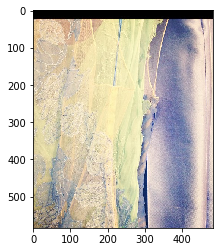

2eb68081c81bc26cd1e119e5df8aa983-2


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.imshow(cv2.cvtColor(cropped_images_labeled[100][1], cv2.COLOR_BGR2RGB))
plt.show()
print (cropped_images_labeled[100][0])

In [36]:
width_fixed = 250
height_fixed = 250

In [37]:
# low dimention images 

low_dimension_images = []
high_dimension_images = []

for i in range(len(cropped_images_labeled)):
    if (np.shape(cropped_images_labeled[i][1])[0] < width_fixed) | (np.shape(cropped_images_labeled[i][1])[1] < height_fixed):
        low_dimension_images.append(cropped_images_labeled[i])
    else:
        high_dimension_images.append(cropped_images_labeled[i])

print (np.shape(low_dimension_images))

print (np.shape(high_dimension_images))

print (np.shape(low_dimension_images)[0] + np.shape(high_dimension_images)[0])

print (np.shape(cropped_images_labeled))



(181, 2)
(2498, 2)
2679
(2679, 2)


In [38]:
import time
start = time.time()

for i in range(len(low_dimension_images)):
    low_dimension_images[i][1] = cv2.resize(low_dimension_images[i][1],(width_fixed,height_fixed), \
                                            interpolation = cv2.INTER_AREA)
    low_dimension_images[i][1] = cv2.bilateralFilter(low_dimension_images[i][1],11, 21, 7)
    
for i in range(len(high_dimension_images)):
    high_dimension_images[i][1] = cv2.resize(high_dimension_images[i][1],(width_fixed,height_fixed), \
                                            interpolation = cv2.INTER_CUBIC)
    high_dimension_images[i][1] = cv2.bilateralFilter(high_dimension_images[i][1],11, 21, 7)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:00:46.80


In [39]:
for i in range(len(low_dimension_images)):
    cv2.imwrite('.//Data//Test_images_after_crop//'+ low_dimension_images[i][0]+".jpg", low_dimension_images[i][1])


In [40]:
for i in range(len(high_dimension_images)):
    cv2.imwrite('.//Data//Test_images_after_crop//'+ high_dimension_images[i][0]+".jpg", high_dimension_images[i][1])
    

In [ ]:
################################################################################################

In [1]:
import pandas as pd
import numpy as np
# import keras
import tensorflow
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Lambda

from tensorflow.keras.layers import Softmax
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import LeakyReLU

import cv2
import numpy
import glob
import pylab as plt
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm
import math
from  tensorflow.keras.callbacks import EarlyStopping

import sklearn

import pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# from tensorflow.keras.layers import LeakyReLU
import tensorflow
model = tensorflow.keras.models.load_model('model_test_v4.h5', custom_objects={'LeakyReLU': LeakyReLU})

# model = tensorflow.keras.models.load_model('model_CE_15_epochs_64_BS_softmax_CE.h5', custom_objects={'LeakyReLU': LeakyReLU})

In [3]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0

In [17]:
folders = glob.glob('.//Data//Test_images_after_crop//')
imagenames_list = []

for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
#         if f in image_names:
        imagenames_list.append(f)
len(imagenames_list)

2679

In [18]:
imagenames_list[1]

'.//Data//Test_images_after_crop/bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg'

In [21]:
for batch_sample in imagenames_list[0:12]:
    print (str(batch_sample).replace(".//Data//Test_images_after_crop/", ""))

143841dfb41b8ef1dcf41f9494af993b-black.jpg
bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg
2364884bd20067465043d120ad544959-mustard.jpg
a8294e16fccfe1cd0fe4a326f4d38056-blackmulti.jpg
586f5d34a73ec0efe69979df08cf02b4-1.jpg
959cceb7eef2986131cff1c04d497066-emberwhite.jpg
51ca03d14660998fd726cf0348637af6-blackwhite.jpg
1d8d481b1bc5e7eba29d7197867a252d-black.jpg
e4f9f8c71b622aae59ff435fa5633ab2-blue.jpg
8072e375d9727653c1aac676987dfa0a-yellow.jpg
8d4b0e3a6a9b6a53a502d7f2e839d500-bluemulti.jpg
85ed0678922baa8d5ef276c4e6dff3bd-whiteblackdot.jpg


In [86]:

# def processInput(image):
# num_cores = multiprocessing.cpu_count() - 2
# num_cores

# i = 0
# test_images_Predict = []
# test_labels = []

# for batch_sample in imagenames_list:
    
# #     print (batch_sample)
#     image = cv2.imread(batch_sample)
#     b,g,r = cv2.split(image)       # get b,g,r
#     image = cv2.merge([r,g,b]) 

#     image = (image/255.0) - 0.5
#     proba_11 = model.predict(image.reshape(1,250,250,3))
  
#     test_images_Predict.append([str(batch_sample).replace(".//Data//Test_images_after_crop/", ""), proba_11])
#     i +=1
#     if (i % 100==0): 
        
#         print (i)

In [88]:
import time
start = time.time()

i = 0
test_images_Predict = []

for batch_sample in imagenames_list:
#     print (batch_sample)
    image = cv2.imread(batch_sample)
    b,g,r = cv2.split(image)       # get b,g,r
    image = cv2.merge([r,g,b]) 

    image = (image/255.0) - 0.5
    proba_11 = model.predict(image.reshape(1,250,250,3))
  
    test_images_Predict.append([str(batch_sample).replace(".//Data//Test_images_after_crop/", ""), proba_11])
    i += 1
    if (i % 500==0): 
        print (i)
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

500
1000
1500
2000
2500


In [89]:
len(test_images_Predict)

2679

In [90]:
test_images_Predict[1]

['bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg',
 array([[9.3311071e-05, 9.9986142e-01, 5.4627657e-05, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 2.0861626e-07, 1.0000000e+00,
         0.0000000e+00]], dtype=float32)]

In [91]:
test_images_Predict[1][0]

'bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg'

In [92]:
test_images_Predict[1][1]

array([[9.3311071e-05, 9.9986142e-01, 5.4627657e-05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0861626e-07, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [93]:
test_images_Predict[1][1][0]

array([9.3311071e-05, 9.9986142e-01, 5.4627657e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.0861626e-07, 1.0000000e+00,
       0.0000000e+00], dtype=float32)

In [94]:
test_images_Predict[1][1][0][8]

0.0

In [95]:

temp = []
for i in range(len(test_images_Predict)):
    temp_dataframe = pd.DataFrame(columns=['filename', 'Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe'])
    
    
    temp.append([test_images_Predict[i][0],     
               test_images_Predict[i][1][0][0],
               test_images_Predict[i][1][0][1],
               test_images_Predict[i][1][0][2],
               test_images_Predict[i][1][0][3],
               test_images_Predict[i][1][0][4],
               test_images_Predict[i][1][0][5],
               test_images_Predict[i][1][0][6],
               test_images_Predict[i][1][0][7],
               test_images_Predict[i][1][0][8]])
    
    
    

In [101]:
final_prediction = pd.DataFrame(temp,columns=['filename', 'Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe'])

In [102]:
final_prediction.shape

(2679, 10)

In [103]:
final_prediction.head()

,filename,Blouses,Dresses,Skirts,camouflage,check,floral_print,leopard_print,polka_dot,stripe
0,143841dfb41b8ef1dcf41f9494af993b-black.jpg,0.812285,0.105388,0.154760,5.786425e-02,0.127440,0.091835,4.984143e-02,0.058616,0.728991
1,bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg,0.000093,0.999861,0.000055,0.000000e+00,0.000000,0.000000,2.086163e-07,1.000000,0.000000
2,2364884bd20067465043d120ad544959-mustard.jpg,0.243738,0.621038,0.126217,2.028644e-04,0.032935,0.001463,8.467138e-04,0.005969,0.935587
3,a8294e16fccfe1cd0fe4a326f4d38056-blackmulti.jpg,0.055753,0.842316,0.087247,9.536743e-07,0.994070,0.000039,1.409948e-04,0.001301,0.002811
4,586f5d34a73ec0efe69979df08cf02b4-1.jpg,0.024571,0.107302,0.861007,7.404807e-02,0.226180,0.246811,1.096816e-01,0.197786,0.323145


In [105]:
test_images_Predict[1]

['bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg',
 array([[9.3311071e-05, 9.9986142e-01, 5.4627657e-05, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 2.0861626e-07, 1.0000000e+00,
         0.0000000e+00]], dtype=float32)]

In [106]:
final_prediction["product_type"] = final_prediction[['Blouses', 'Dresses', 'Skirts']].idxmax(axis=1)
final_prediction["fabric_print_type"] = final_prediction[['camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']].idxmax(axis=1)

In [107]:
final_prediction.head()


,filename,Blouses,Dresses,Skirts,camouflage,check,floral_print,leopard_print,polka_dot,stripe,product_type,fabric_print_type
0,143841dfb41b8ef1dcf41f9494af993b-black.jpg,0.812285,0.105388,0.154760,5.786425e-02,0.127440,0.091835,4.984143e-02,0.058616,0.728991,Blouses,stripe
1,bb81806ad6cff4552d4f1e74176c18ba-blackdot.jpg,0.000093,0.999861,0.000055,0.000000e+00,0.000000,0.000000,2.086163e-07,1.000000,0.000000,Dresses,polka_dot
2,2364884bd20067465043d120ad544959-mustard.jpg,0.243738,0.621038,0.126217,2.028644e-04,0.032935,0.001463,8.467138e-04,0.005969,0.935587,Dresses,stripe
3,a8294e16fccfe1cd0fe4a326f4d38056-blackmulti.jpg,0.055753,0.842316,0.087247,9.536743e-07,0.994070,0.000039,1.409948e-04,0.001301,0.002811,Dresses,check
4,586f5d34a73ec0efe69979df08cf02b4-1.jpg,0.024571,0.107302,0.861007,7.404807e-02,0.226180,0.246811,1.096816e-01,0.197786,0.323145,Skirts,stripe


In [108]:
final_prediction.to_csv("CaseStudyFinalTestPredctionScore.csv", index = False)